<center>
    <h1 id='shap-values' style='color:#7159c1'>🔎 Shap Values 🔎</h1>
    <i>For any single prediction from a model, how did each feature in the data affect that particular prediction?</i>
</center>

---


Whereas Partial Plots explains the features' impacts over the general predictions, `Shap Values` explains the features' impacts over a single prediction. So, Shap Values is largely applied in Production Environment, while Partial Plots, in Development Environment.

To calculate them, we gotta get a row from the dataset, and calculate the prediction assuming some fictional values for the features (Baseline) and calculate the prediction with the real values (Real Prediction). The Shap Value will be the difference between the Real Prediction and the Baseline Prediction.

$$
\text{sum of Shap Values for all features} = \text{prediction for real values} - \text{prredictions for baseline values}
$$


To stick it on your mind, suppose instead of ask:

> *"How much was a prediction driven by the fact that a car has 100 of horse power?"*

we ask:

> *"How much was a prediction driven by the fact that a car has 100 of horse power, instead of some baseline value for horse power."*

<br />

![Shap Values Example](https://storage.googleapis.com/kaggle-media/learn/images/JVD2U7k.png)

<br />

How do you interpret this?

We predicted 0.7, whereas the base_value is 0.4979. Feature values causing increased predictions are in pink, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue.

The biggest impact comes from Goal Scored being 2. Though the ball possession value has a meaningful effect decreasing the prediction.

If you subtract the length of the blue bars from the length of the pink bars, it equals the distance from the base value to the output.

In [10]:
# ---- Importations ----
import pandas as pd # pip install pandas

from sklearn.model_selection import train_test_split # pip install sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay

import shap # pip install shap

import matplotlib.pyplot as plt # pip install matplotlib
import mplcyberpunk # pip install cyberpunk

plt.style.use('cyberpunk')

# ---- Preparing Dataset ----
autos_df = pd.read_csv('./datasets/autos.csv')
autos_df = autos_df.select_dtypes(exclude='object')

X = autos_df.copy()
y = X.pop('price')

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y
    , train_size=0.70
    , test_size=0.30
    , random_state=20242301
)

# ---- Preparing the Model ----
random_forest_model = RandomForestRegressor(
    n_estimators=100
    , random_state=20242301
)

random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=20242301)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


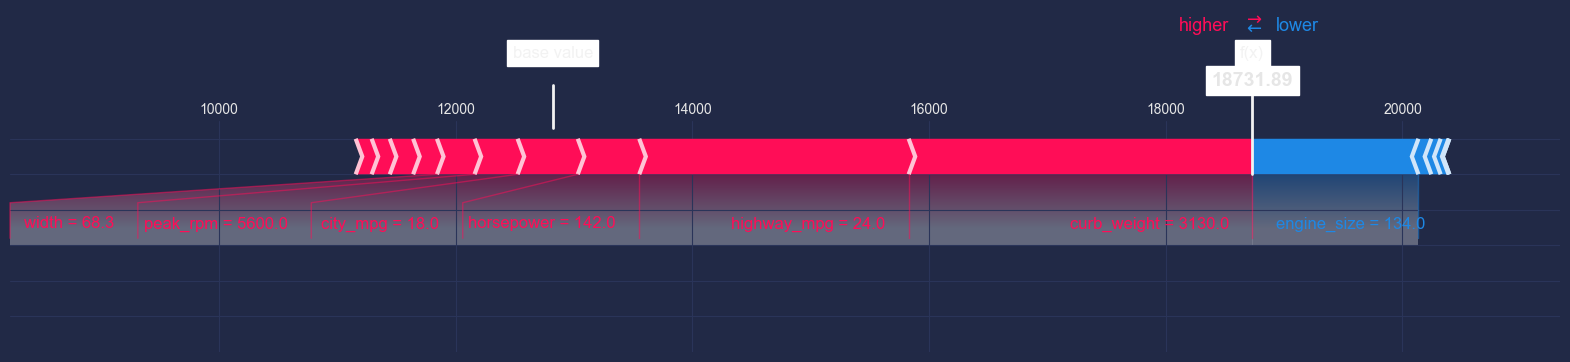

In [31]:
# ---- Selecting a Single Row to Calculate Shap Value ----
#
# - in this example we used a single row, but we can select multiples
#
row_to_show = 5
data_for_prediction = X_valid.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

# Real Prediction
real_prediction = random_forest_model.predict(data_for_prediction_array)

# Calculating Shap Values
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(data_for_prediction)

# Showing Shap Values' Results
shap.initjs()

# List Positions:
# [0] >> Negative Outcome
# [1] >> Positive Outcome (always consider this on in Shap Values)
#
# explainer.expected_value[1] >> Real Prediction
# shap_values[1] >> Baseline Prediction
# data_for_prediction >> Selected Data
#
# shap.force_plot(
#     explainer.expected_value[0]
#     , shap_values[0]
#     , data_for_prediction
# )

shap.plots.force(
    explainer.expected_value
    , shap_values
    , data_for_prediction
    , matplotlib=True
)

---

If you look carefully at the code where we created the SHAP values, you'll notice we reference  Trees in 'shap.TreeExplainer(my_model)'. But the SHAP package has explainers for every type of model.

> **shap.DeepExplainer** - `works with Deep Learning models`;

> **shap.KernelExplainer** - `works with all models, though it is slower than other Explainers and it offers an approximation rather than exact Shap values`.

Here is an example using KernelExplainer to get similar results. The results aren't identical because KernelExplainer gives an approximate result. But the results tell the same story:

Using 135 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


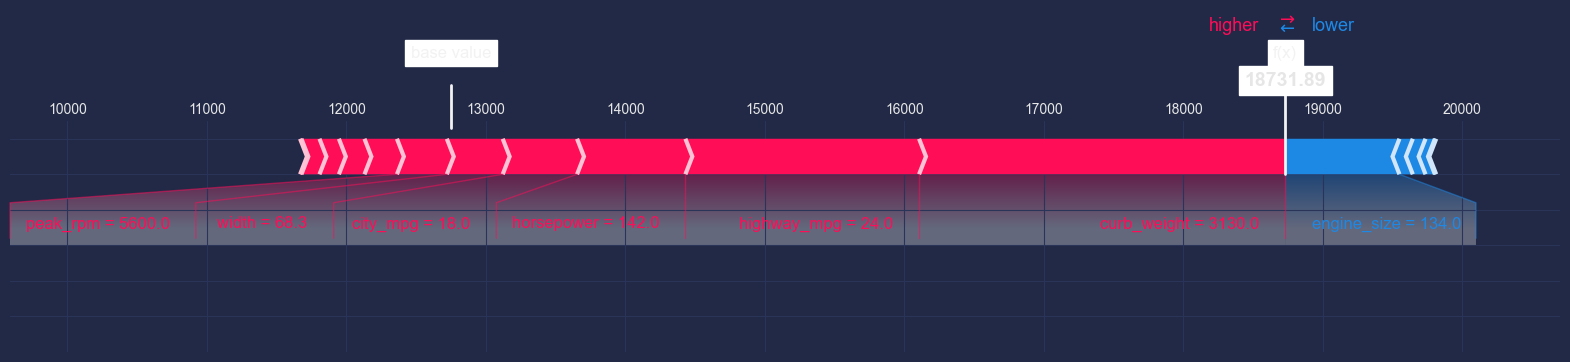

In [32]:
# use Kernel SHAP to explain test set predictions
#
# realize that we have to calculate the 'predict_proba' and provides
# the whole Train dataset because 'KernelExplainer' doesn't know which
# model we're using, so it must receive these parameters as a basis
k_explainer = shap.KernelExplainer(random_forest_model.predict, X_train)
k_shap_values = k_explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(
    k_explainer.expected_value
    , k_shap_values
    , data_for_prediction
    , matplotlib=True
)

---

<h1 id='reach-me' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>📫 | Reach Me</h1>

> **Email** - [csfelix08@gmail.com](mailto:csfelix08@gmail.com?)

> **Linkedin** - [linkedin.com/in/csfelix/](https://www.linkedin.com/in/csfelix/)

> **GitHub:** - [CSFelix](https://github.com/CSFelix)

> **Kaggle** - [DSFelix](https://www.kaggle.com/dsfelix)

> **Portfolio** - [CSFelix.io](https://csfelix.github.io/).